# Problem 4: Entanglement purification

solver: 房伯文

### (a) 1-order Trotter decomposition

In [39]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import SuzukiTrotter
from qiskit_aer import AerSimulator
import math
import numpy as np

T = 2.0
Ms = [100, 200, 500, 1000]
Bx = By = Bz = 2*math.pi

circ = QuantumCircuit(1)
circ.h(0)

def Hamiltonian():
    pauli_list = ['X', 'Y', 'Z']
    coeffs = [Bx, By, Bz]

    H = SparsePauliOp(pauli_list, coeffs)
    return H

H = Hamiltonian()

# U = PauliEvolutionGate(H, T)
# st = SuzukiTrotter(order=1, reps=Ms[1])
# circ.append(st.synthesize(U), range(1))
# circ.draw("mpl")
# circ.save_statevector(label="psi")

M=100,  final P(|0⟩)=0.360398
M=200,  final P(|0⟩)=0.710636
M=500,  final P(|0⟩)=0.891783
M=1000,  final P(|0⟩)=0.934477


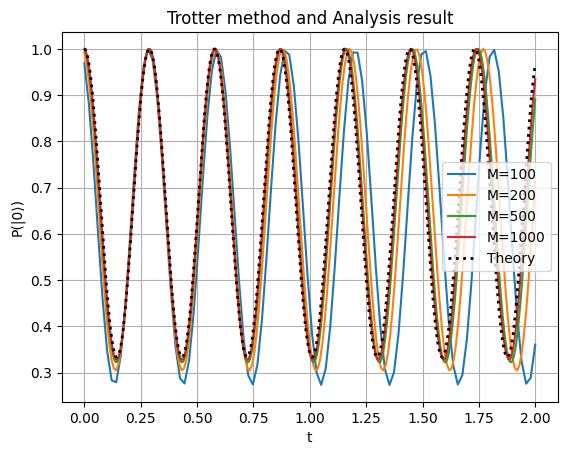

In [40]:
import matplotlib.pyplot as plt
for M in Ms:
    dt = T / M

    circ = QuantumCircuit(1)

    probs = []
    state_temp = Statevector.from_label('0')

    for step in range(M):
        U_t = PauliEvolutionGate(H, dt)
        st = SuzukiTrotter(order=1, reps=1)
        circ.append(st.synthesize(U_t), [0])
        state_temp = state_temp.evolve(st.synthesize(U_t))
        probs.append(abs(state_temp.data[0])**2)
    
    state = Statevector.from_instruction(circ)
    amp0 = abs(state.data[0])**2
    print(f"M={M},  final P(|0⟩)={amp0:.6f}")

    ts = np.linspace(0, T, M)
    plt.plot(ts, probs, label=f"M={M}")

# plot the analysis result
t_fine = np.linspace(0, T, 2000)
P_theory = (2*np.cos(2*np.sqrt(3)*np.pi*t_fine)**2 + 1) / 3
plt.plot(t_fine, P_theory, 'k:', linewidth=2, label="Theory")

plt.xlabel("t")
plt.ylabel("P(|0⟩)")
plt.legend()
plt.grid()
plt.title("Trotter method and Analysis result")
plt.show()

### (c) 2-order Trotter decomposition

M=100,  final P(|0⟩)=0.948439
M=200,  final P(|0⟩)=0.962441
M=500,  final P(|0⟩)=0.965996
M=1000,  final P(|0⟩)=0.966490


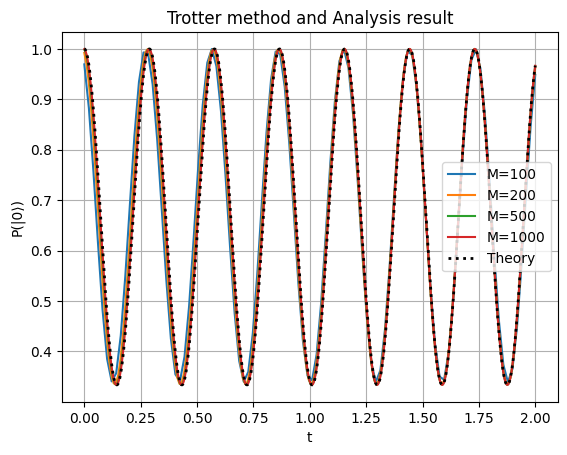

In [41]:
import matplotlib.pyplot as plt
for M in Ms:
    dt = T / M

    circ = QuantumCircuit(1)

    probs = []
    state_temp = Statevector.from_label('0')

    for step in range(M):
        U_t = PauliEvolutionGate(H, dt)
        st = SuzukiTrotter(order=2, reps=1)
        circ.append(st.synthesize(U_t), [0])
        state_temp = state_temp.evolve(st.synthesize(U_t))
        probs.append(abs(state_temp.data[0])**2)
    
    state = Statevector.from_instruction(circ)
    amp0 = abs(state.data[0])**2
    print(f"M={M},  final P(|0⟩)={amp0:.6f}")

    ts = np.linspace(0, T, M)
    plt.plot(ts, probs, label=f"M={M}")

# plot the analysis result
t_fine = np.linspace(0, T, 2000)
P_theory = (2*np.cos(2*np.sqrt(3)*np.pi*t_fine)**2 + 1) / 3
plt.plot(t_fine, P_theory, 'k:', linewidth=2, label="Theory")

plt.xlabel("t")
plt.ylabel("P(|0⟩)")
plt.legend()
plt.grid()
plt.title("Trotter method and Analysis result")
plt.show()

- In conclusion, the 2-order Trotter decomposition is better than 1-order Trotter decomposition, achieving better approximation to the real (analytic) result.